# Figure 3: Forelimb movement behavior in a primate
For reference, here is the full figure

![Figure3](https://images.squarespace-cdn.com/content/v1/57f6d51c9f74566f55ecf271/04855fee-76f8-47cb-8c2c-ff0277dfc885/fig3grey.png?format=2500w)

#### import plot and data loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_hdf("data/Figure3.h5", key = "data")

## Figure 3a

- Behavioral setup: monkey makes either active movements in 8 directions with the manipulandum, or the arm is passively moved via the manipulandum (real behavioral trajectories shown, with cartoon depicting the task setup). Behavior and neural recordings are from area 2 of the primary somatosensory cortex from Chowdhury et al.

(-7.249750447273255, 6.267432045936585, -4.10022519826889, 3.132592189311981)

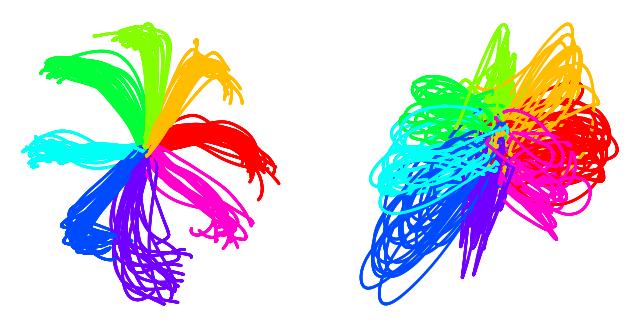

In [4]:
active = data["behavior"]["active"]
active_target = data["behavior"]["active_target"]

passive = data["behavior"]["passive"]
passive_target = data["behavior"]["passive_target"]

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax1.scatter(active[:, 0], active[:, 1], color=plt.cm.hsv(1 / 8 * active_target), s=1)
ax1.axis("off")

ax2 = plt.subplot(122)
ax2.scatter(passive[:, 0], passive[:, 1], color=plt.cm.hsv(1 / 8 * passive_target), s=1)
ax2.axis("off")

(-7.249750447273255, 6.267432045936585, -4.10022519826889, 3.132592189311981)

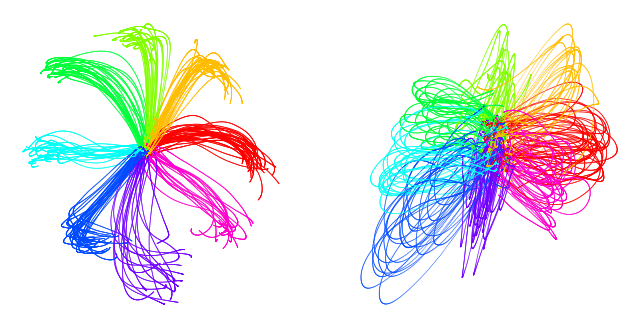

In [3]:
active = data["behavior"]["active"]
active_target = data["behavior"]["active_target"]

passive = data["behavior"]["passive"]
passive_target = data["behavior"]["passive_target"]

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)
ax1.scatter(active[:, 0], active[:, 1], color=plt.cm.hsv(1 / 8 * active_target), s=0.4, edgecolors='none')
ax1.axis("off")

ax2 = plt.subplot(122)
ax2.scatter(passive[:, 0], passive[:, 1], color=plt.cm.hsv(1 / 8 * passive_target), s=0.4, edgecolors='none')
ax2.axis("off")

# plt.savefig('cebra-figures_figures_Figure3_1.png', transparent=True, dpi=300)


## Figure 3b

- Comparison of embeddings of active trials generated with CEBRA-Behavior, CEBRA-Time, conv-pi-VAE variants, tSNE, and UMAP. The embeddings of trials (n=364) of each direction are post-hoc averaged.

The embedding sizes of the various models can be obtained as follows (and the plot above adapted to show other dimensions). Note that autoLFADS was trained in 4D, and was then projected to 2D using a PCA.

In [5]:
methods = [
  "cebra-behavior",
  "pivae_w",
  "cebra-time",
  "pivae_wo",
  "autolfads",
  "tsne",
  "umap",
]

emissions_list = [
    overview["cebra-behavior"],
    overview["pivae_w"],
    overview["cebra-time"],
    overview["pivae_wo"],
    overview["tsne"],
    overview["umap"],
]

for m, e in zip(methods, emissions_list):
  print(m, e.shape)

cebra-behavior (115800, 4)
pivae_w (115800, 4)
cebra-time (115800, 4)
pivae_wo (115800, 4)
autolfads (115800, 2)
tsne (115800, 2)


## Figure 3c

- CEBRA-Behavior trained with x,y position of the hand. Left panel is color-coded to x position and right panel is color-coded to y position.

## Figure 3d

- CEBRA-Time without any external behavior variables. As in \textbf{c}, left and right are color-coded to x and y position, respectively.

## Figure 3e

- Left, CEBRA-Behavior embedding trained with a 4D latent space, with target direction and active OR passive trials (trained separately) as behavior labels. Plotted separately, active vs. passive training condition.

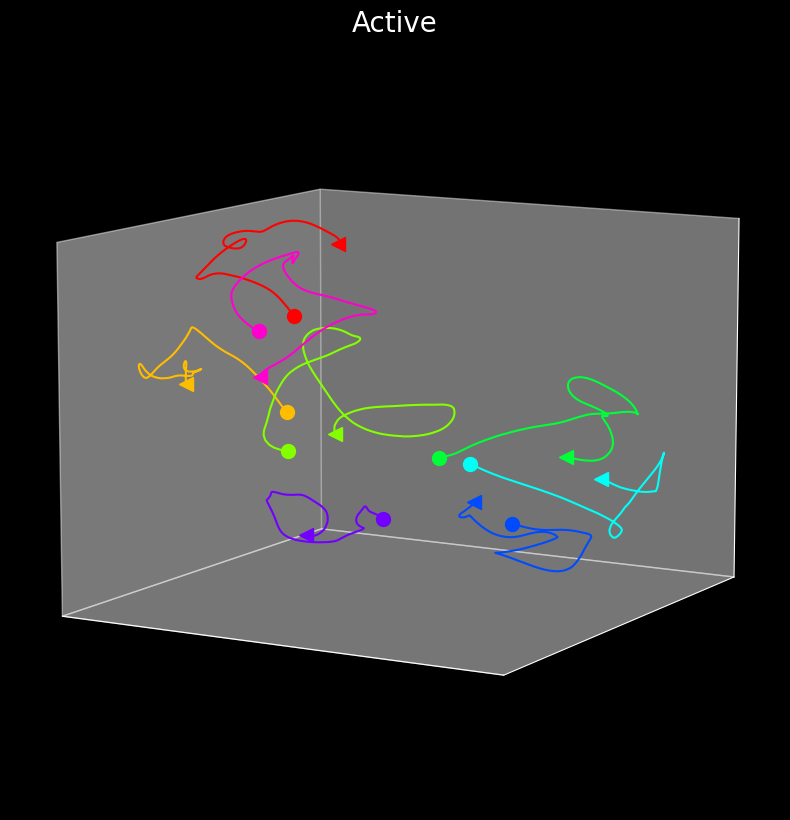

In [11]:
import matplotlib.animation as animation
import numpy as np

# set style
plt.style.use('dark_background')

active_trials_index = active_label

active_trials = active_emission.reshape(-1, 600, feature_num)
active_trials_labels = active_label.reshape(-1, 600)[:, 0].squeeze()
mean_active_trials = []

for i in range(8):
    mean_active_trial = active_trials[active_trials_labels == i].mean(
        axis=0
    ) / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0))
    mean_active_trials.append(mean_active_trial)

# define the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Active", fontsize=20, color='white')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Create a list to store line objects for the animation
lines = [ax.plot([], [], [], color=plt.cm.hsv(1 / 8 * i))[0] for i in range(8)]

# Calculate the minimum and maximum values for the axis limits
xmin = min([trial[:, idx1].min() for trial in mean_active_trials])
xmax = max([trial[:, idx1].max() for trial in mean_active_trials])

ymin = min([trial[:, idx2].min() for trial in mean_active_trials])
ymax = max([trial[:, idx2].max() for trial in mean_active_trials])

zmin = min([trial[:, idx3].min() for trial in mean_active_trials])
zmax = max([trial[:, idx3].max() for trial in mean_active_trials])

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    # Set axes limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])

    return lines

# animation function: this is called sequentially
def animate(i):
    if i < 600:  # stop line drawing after 600 frames
        for idx, line in enumerate(lines):
            trial = mean_active_trials[idx]
            line.set_data(trial[:i, idx1], trial[:i, idx2])
            line.set_3d_properties(trial[:i, idx3])

            # Plot start and end points
            if i == 0:
                ax.plot(trial[0, idx1], trial[0, idx2], trial[0, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="o", markersize=10)
            elif i == len(trial)-1:
                ax.plot(trial[-1, idx1], trial[-1, idx2], trial[-1, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="<", markersize=10)

    # Rotate the point of view of the 3D plot
    ax.view_init(elev=10., azim=i*0.1)
    return lines

# call the animator. blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600+600, interval=20, blit=True)

# save the animation as an mp4 file
anim.save('active_animation4.mp4', writer='ffmpeg', fps=60)


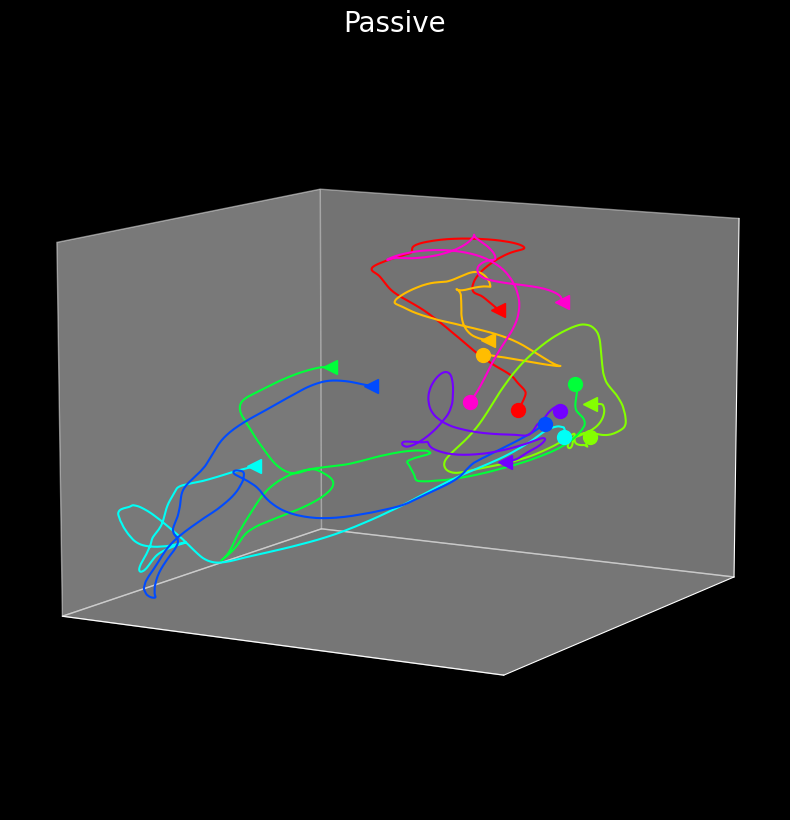

In [10]:
import matplotlib.animation as animation
import numpy as np

# set style
plt.style.use('dark_background')

passive_trials_index = passive_label
passive_trials = passive_emission.reshape(-1, 600, feature_num)
passive_trials_labels = passive_label.reshape(-1, 600)[:, 0].squeeze()
mean_passive_trials = []

for i in range(8):
    mean_passive_trial = passive_trials[passive_trials_labels == i].mean(
        axis=0
    ) / np.linalg.norm(passive_trials[passive_trials_labels == i].mean(axis=0))
    mean_passive_trials.append(mean_passive_trial)

# define the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Passive", fontsize=20, color='white')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Create a list to store line objects for the animation
lines = [ax.plot([], [], [], color=plt.cm.hsv(1 / 8 * i))[0] for i in range(8)]

# Calculate the minimum and maximum values for the axis limits
xmin = min([trial[:, idx1].min() for trial in mean_passive_trials])
xmax = max([trial[:, idx1].max() for trial in mean_passive_trials])

ymin = min([trial[:, idx2].min() for trial in mean_passive_trials])
ymax = max([trial[:, idx2].max() for trial in mean_passive_trials])

zmin = min([trial[:, idx3].min() for trial in mean_passive_trials])
zmax = max([trial[:, idx3].max() for trial in mean_passive_trials])

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    # Set axes limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])

    return lines

# animation function: this is called sequentially
def animate(i):
    if i < 600:  # stop line drawing after 600 frames
        for idx, line in enumerate(lines):
            trial = mean_passive_trials[idx]
            line.set_data(trial[:i, idx1], trial[:i, idx2])
            line.set_3d_properties(trial[:i, idx3])

            # Plot start and end points
            if i == 0:
                ax.plot(trial[0, idx1], trial[0, idx2], trial[0, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="o", markersize=10)
            elif i == len(trial)-1:
                ax.plot(trial[-1, idx1], trial[-1, idx2], trial[-1, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="<", markersize=10)

    # Rotate the point of view of the 3D plot
    ax.view_init(elev=10., azim=i*0.1)
    return lines

# call the animator. blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600+600, interval=20, blit=True)

# save the animation as an mp4 file
anim.save('active_animation5.mp4', writer='ffmpeg', fps=60)


## Figure 3f

- Left, CEBRA-Behavior embedding trained with a 4D latent space, with target direction and active and passive trials as behavior labels, but plotted separately, active vs. passive trials.

Text(0.5, 0.92, 'Passive')

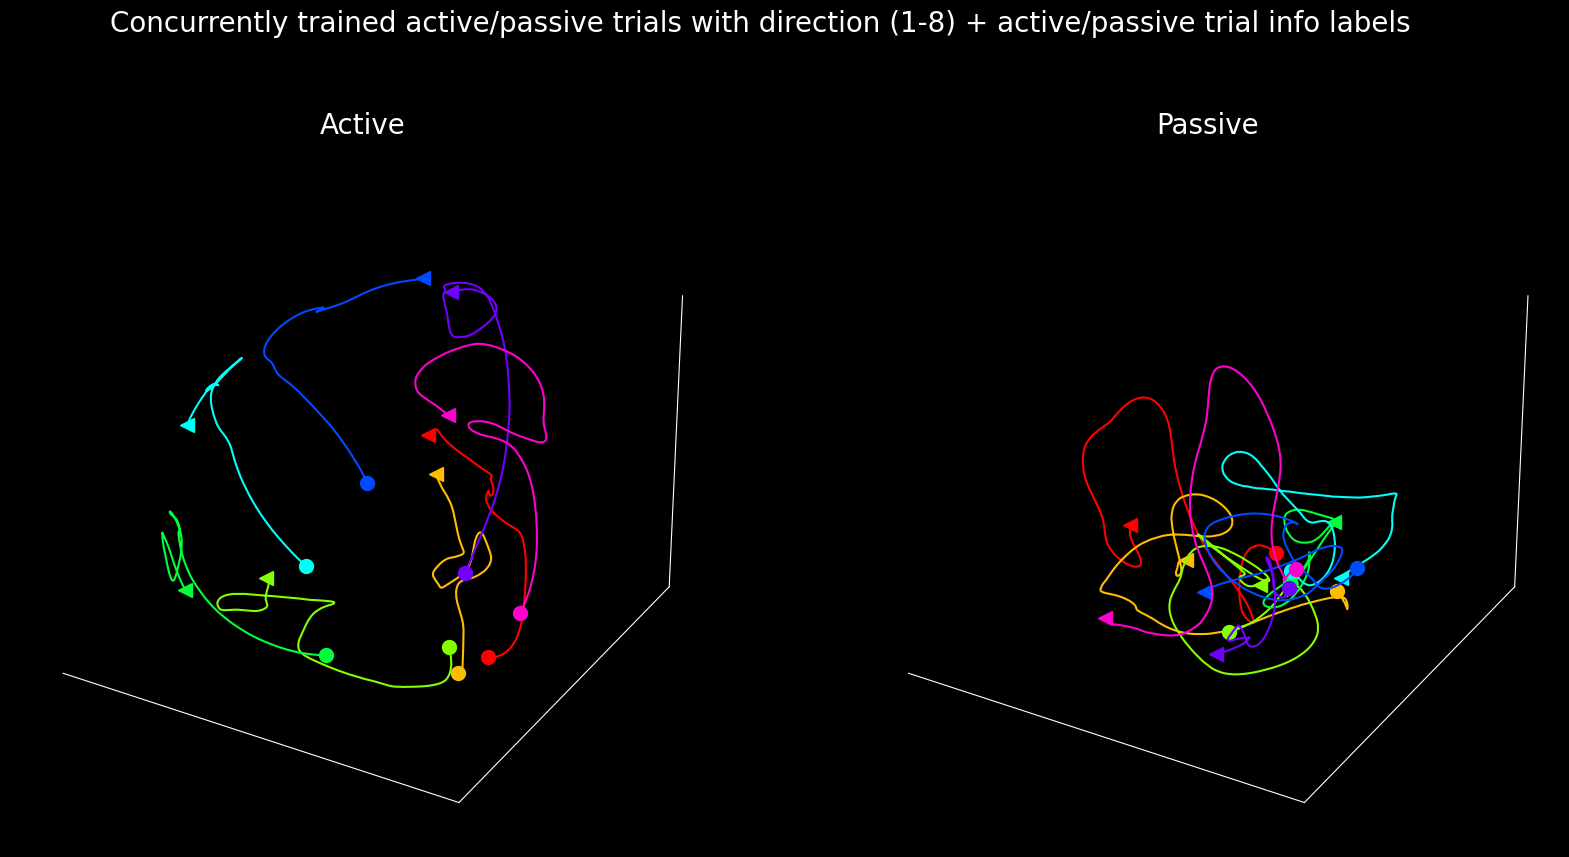

In [17]:
target_emission = data["cebra_ap_all"]["embedding"]
target_label = data["cebra_ap_all"]["label"]

fig = plt.figure(
    figsize=(20, 10),
)
fig.suptitle(
    "Concurrently trained active/passive trials with direction (1-8) + active/passive trial info labels",
    fontsize=20,
)
idx1, idx2, idx3 = 2, 0, 1
active_trials_index = target_label < 8
active_trials = target_emission[active_trials_index].reshape(-1, 600, feature_num)
active_trials_labels = (
    target_label[active_trials_index].reshape(-1, 600)[:, 0].squeeze()
)
mean_active_trials = []

for i in range(8):
    mean_active_trial = (
        active_trials[active_trials_labels == i].mean(axis=0)
        / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_active_trials.append(mean_active_trial)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
for trial, label in zip(mean_active_trials, np.arange(8)):
    ax1.plot(
        trial[:, idx1], trial[:, idx2], trial[:, idx3], color=plt.cm.hsv(1 / 8 * label)
    )
    ax1.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="o",
        markersize=10,
    )
    ax1.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax1)
ax1.set_title("Active", fontsize=20)

# ax3 = fig.add_subplot(2,2,3)
passive_trials_index = target_label >= 8
passive_trials = target_emission[passive_trials_index].reshape(-1, 600, feature_num)
passive_trials_labels = (
    target_label[passive_trials_index].reshape(-1, 600)[:, 0].squeeze()
)
mean_passive_trials = []

for i in range(8, 16):
    mean_passive_trial = (
        passive_trials[passive_trials_labels == i].mean(axis=0)
        / np.linalg.norm(
            passive_trials[passive_trials_labels == i].mean(axis=0), axis=1
        )[:, None]
    )
    mean_passive_trials.append(mean_passive_trial)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")

for trial, label in zip(mean_passive_trials, np.arange(8, 16)):
    ax2.plot(
        trial[:, idx1],
        trial[:, idx2],
        trial[:, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
    )
    ax2.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="o",
        markersize=10,
    )
    ax2.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax2)
ax2.set_title("Passive", fontsize=20)

# plt.savefig('cebra-figures_figures_Figure3_6.png', transparent=True, dpi=500)

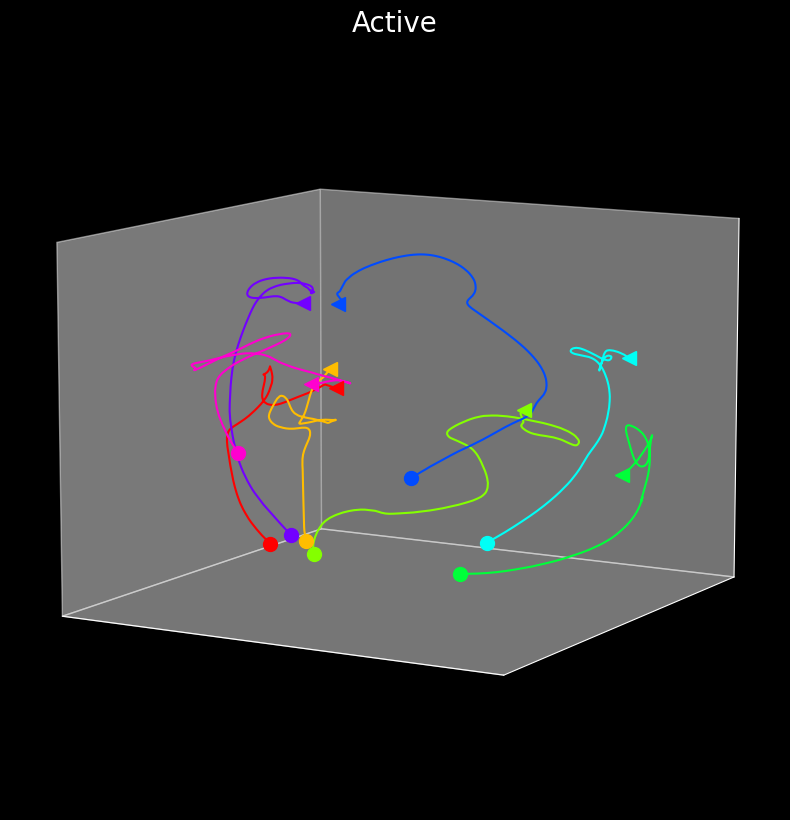

In [19]:
# set style
plt.style.use('dark_background')

# This section is modified to match the equivalent section in code 1
target_emission = data["cebra_ap_all"]["embedding"]
target_label = data["cebra_ap_all"]["label"]

idx1, idx2, idx3 = 2, 0, 1
active_trials_index = target_label < 8
active_trials = target_emission[active_trials_index].reshape(-1, 600, feature_num)
active_trials_labels = target_label[active_trials_index].reshape(-1, 600)[:, 0].squeeze()
mean_active_trials = []

for i in range(8):
    mean_active_trial = (
        active_trials[active_trials_labels == i].mean(axis=0)
        / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_active_trials.append(mean_active_trial)

# define the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Active", fontsize=20, color='white')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Create a list to store line objects for the animation
lines = [ax.plot([], [], [], color=plt.cm.hsv(1 / 8 * i))[0] for i in range(8)]

# Calculate the minimum and maximum values for the axis limits
xmin = min([trial[:, idx1].min() for trial in mean_active_trials])
xmax = max([trial[:, idx1].max() for trial in mean_active_trials])

ymin = min([trial[:, idx2].min() for trial in mean_active_trials])
ymax = max([trial[:, idx2].max() for trial in mean_active_trials])

zmin = min([trial[:, idx3].min() for trial in mean_active_trials])
zmax = max([trial[:, idx3].max() for trial in mean_active_trials])

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    # Set axes limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])

    return lines

# animation function: this is called sequentially
def animate(i):
    if i < 600:  # stop line drawing after 600 frames
        for idx, line in enumerate(lines):
            trial = mean_active_trials[idx]
            line.set_data(trial[:i, idx1], trial[:i, idx2])
            line.set_3d_properties(trial[:i, idx3])

            # Plot start and end points
            if i == 0:
                ax.plot(trial[0, idx1], trial[0, idx2], trial[0, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="o", markersize=10)
            elif i == len(trial)-1:
                ax.plot(trial[-1, idx1], trial[-1, idx2], trial[-1, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="<", markersize=10)

    # Rotate the point of view of the 3D plot
    ax.view_init(elev=10., azim=i*0.1)
    return lines

# call the animator. blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600+600, interval=20, blit=True)

# save the animation as an mp4 file
anim.save('active_animation6.mp4', writer='ffmpeg', fps=60)


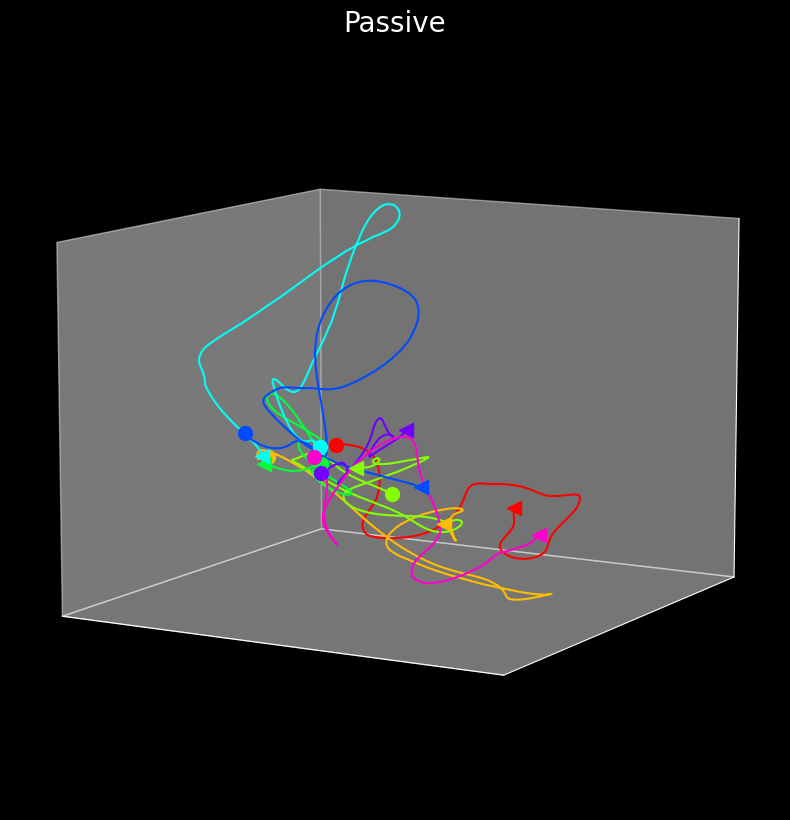

In [20]:
# set style
plt.style.use('dark_background')

# This section is modified to match the equivalent section in code 1
target_emission = data["cebra_ap_all"]["embedding"]
target_label = data["cebra_ap_all"]["label"]

idx1, idx2, idx3 = 2, 0, 1
passive_trials_index = target_label >= 8
passive_trials = target_emission[passive_trials_index].reshape(-1, 600, feature_num)
passive_trials_labels = target_label[passive_trials_index].reshape(-1, 600)[:, 0].squeeze()
mean_passive_trials = []

for i in range(8, 16):
    mean_passive_trial = (
        passive_trials[passive_trials_labels == i].mean(axis=0)
        / np.linalg.norm(passive_trials[passive_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_passive_trials.append(mean_passive_trial)

# define the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Passive", fontsize=20, color='white')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Create a list to store line objects for the animation
lines = [ax.plot([], [], [], color=plt.cm.hsv(1 / 8 * (i-8)))[0] for i in range(8, 16)]

# Calculate the minimum and maximum values for the axis limits
xmin = min([trial[:, idx1].min() for trial in mean_passive_trials])
xmax = max([trial[:, idx1].max() for trial in mean_passive_trials])

ymin = min([trial[:, idx2].min() for trial in mean_passive_trials])
ymax = max([trial[:, idx2].max() for trial in mean_passive_trials])

zmin = min([trial[:, idx3].min() for trial in mean_passive_trials])
zmax = max([trial[:, idx3].max() for trial in mean_passive_trials])

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    # Set axes limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])

    return lines

# animation function: this is called sequentially
def animate(i):
    if i < 600:  # stop line drawing after 600 frames
        for idx, line in enumerate(lines):
            trial = mean_passive_trials[idx]
            line.set_data(trial[:i, idx1], trial[:i, idx2])
            line.set_3d_properties(trial[:i, idx3])

            # Plot start and end points
            if i == 0:
                ax.plot(trial[0, idx1], trial[0, idx2], trial[0, idx3], color=plt.cm.hsv(1 / 8 * (idx)), marker="o", markersize=10)
            elif i == len(trial)-1:
                ax.plot(trial[-1, idx1], trial[-1, idx2], trial[-1, idx3], color=plt.cm.hsv(1 / 8 * (idx)), marker="<", markersize=10)

    # Rotate the point of view of the 3D plot
    ax.view_init(elev=10., azim=i*0.1)
    return lines

# call the animator. blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600+600, interval=20, blit=True)

# save the animation as an mp4 file
anim.save('passive_animation7.mp4', writer='ffmpeg', fps=60)


## Figure 3g

- CEBRA-Behavior embedding trained with a 4D latent space using active and passive trials with continuous position as behavior labels, but post-hoc plotted separately, active vs. passive trials. The trajectory of each direction is averaged across trials (n=18--30 each, per directions) over time. Each trajectory represents 600ms from -100ms before the start of the movement.

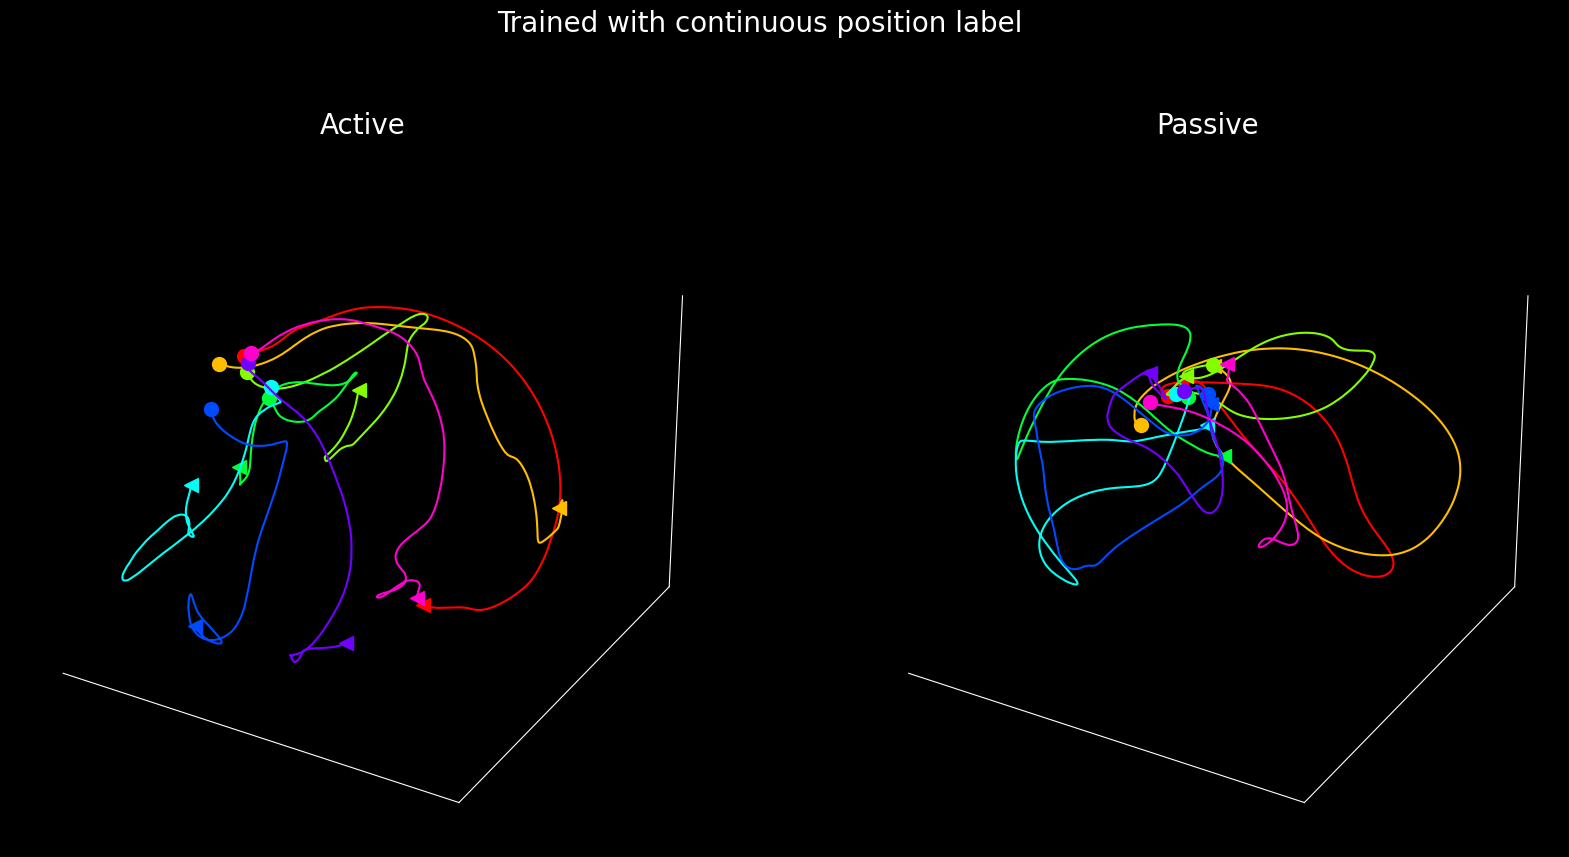

In [15]:
position_emission = data["cebra_pos"]["embedding"]

fig = plt.figure(
    figsize=(20, 10),
)
fig.suptitle("Trained with continuous position label", fontsize=20)

idx1, idx2, idx3 = 0, 1, 2
active_trials_index = target_label < 8

active_trials = position_emission[active_trials_index].reshape(-1, 600, feature_num)
ctive_trials_labels = target_label[active_trials_index].reshape(-1, 600)[:, 0].squeeze()
mean_active_trials = []

for i in range(8):
    mean_active_trial = (
        active_trials[active_trials_labels == i].mean(axis=0)
        / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_active_trials.append(mean_active_trial)

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
for trial, label in zip(mean_active_trials, np.arange(8)):
    ax1.plot(
        trial[:, idx1], trial[:, idx2], trial[:, idx3], color=plt.cm.hsv(1 / 8 * label)
    )
    ax1.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="o",
        markersize=10,
    )
    ax1.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * label),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax1)
ax1.set_title("Active", fontsize=20)

passive_trials_index = target_label >= 8
passive_trials = position_emission[passive_trials_index].reshape(-1, 600, feature_num)
passive_trials_labels = (
    target_label[passive_trials_index].reshape(-1, 600)[:, 0].squeeze()
)
mean_passive_trials = []

for i in range(8, 16):
    mean_passive_trial = (
        passive_trials[passive_trials_labels == i].mean(axis=0)
        / np.linalg.norm(
            passive_trials[passive_trials_labels == i].mean(axis=0), axis=1
        )[:, None]
    )
    mean_passive_trials.append(mean_passive_trial)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")

for trial, label in zip(mean_passive_trials, np.arange(8, 16)):
    ax2.plot(
        trial[:, idx1],
        trial[:, idx2],
        trial[:, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
    )
    ax2.plot(
        trial[0, idx1],
        trial[0, idx2],
        trial[0, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="o",
        markersize=10,
    )
    ax2.plot(
        trial[-1, idx1],
        trial[-1, idx2],
        trial[-1, idx3],
        color=plt.cm.hsv(1 / 8 * (label - 8)),
        marker="<",
        markersize=10,
    )
set_pane_axis(ax2)
ax2.set_title("Passive", fontsize=20)

plt.savefig('cebra-figures_figures_Figure3_7.png', transparent=True, dpi=500)

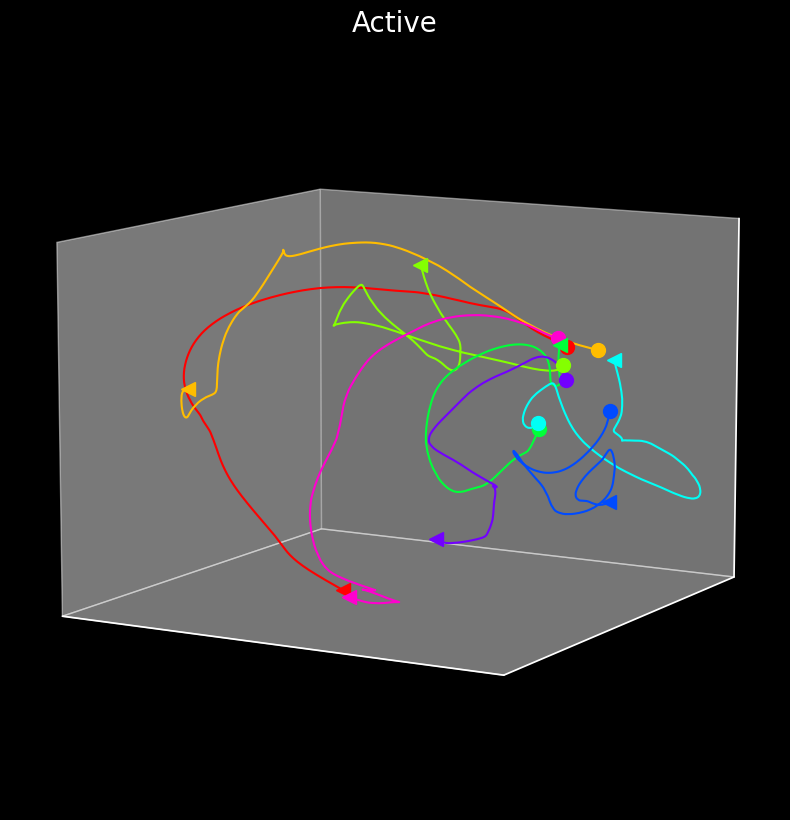

In [22]:
# set style
plt.style.use('dark_background')

# This section is modified to match the equivalent section in code 1
position_emission = data["cebra_pos"]["embedding"]
target_label = data["cebra_ap_all"]["label"]

idx1, idx2, idx3 = 0, 1, 2
active_trials_index = target_label < 8
active_trials = position_emission[active_trials_index].reshape(-1, 600, feature_num)
active_trials_labels = target_label[active_trials_index].reshape(-1, 600)[:, 0].squeeze()
mean_active_trials = []

for i in range(8):
    mean_active_trial = (
        active_trials[active_trials_labels == i].mean(axis=0)
        / np.linalg.norm(active_trials[active_trials_labels == i].mean(axis=0), axis=1)[
            :, None
        ]
    )
    mean_active_trials.append(mean_active_trial)

# define the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Active", fontsize=20, color='white')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Create a list to store line objects for the animation
lines = [ax.plot([], [], [], color=plt.cm.hsv(1 / 8 * i))[0] for i in range(8)]

# Calculate the minimum and maximum values for the axis limits
xmin = min([trial[:, idx1].min() for trial in mean_active_trials])
xmax = max([trial[:, idx1].max() for trial in mean_active_trials])

ymin = min([trial[:, idx2].min() for trial in mean_active_trials])
ymax = max([trial[:, idx2].max() for trial in mean_active_trials])

zmin = min([trial[:, idx3].min() for trial in mean_active_trials])
zmax = max([trial[:, idx3].max() for trial in mean_active_trials])

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    # Set axes limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])

    return lines

# animation function: this is called sequentially
def animate(i):
    if i < 600:  # stop line drawing after 600 frames
        for idx, line in enumerate(lines):
            trial = mean_active_trials[idx]
            line.set_data(trial[:i, idx1], trial[:i, idx2])
            line.set_3d_properties(trial[:i, idx3])

            # Plot start and end points
            if i == 0:
                ax.plot(trial[0, idx1], trial[0, idx2], trial[0, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="o", markersize=10)
            elif i == len(trial)-1:
                ax.plot(trial[-1, idx1], trial[-1, idx2], trial[-1, idx3], color=plt.cm.hsv(1 / 8 * idx), marker="<", markersize=10)

    # Rotate the point of view of the 3D plot
    ax.view_init(elev=10., azim=i*0.1)
    return lines

# call the animator. blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600+600, interval=20, blit=True)

# save the animation as an mp4 file
anim.save('active_animation_pos8.mp4', writer='ffmpeg', fps=60)


## Figure 3h

- Left to right: Decoding performance of: position using CEBRA-Behavior trained with x,y position (active trials); target direction using CEBRA-Behavior trained with target direction (active trials); or active vs. passive accuracy using CEBRA-Behavior trained with both active and passive movements. For each case, we trained and evaluated 5 seeds represented by black dot and the orange line represents median.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


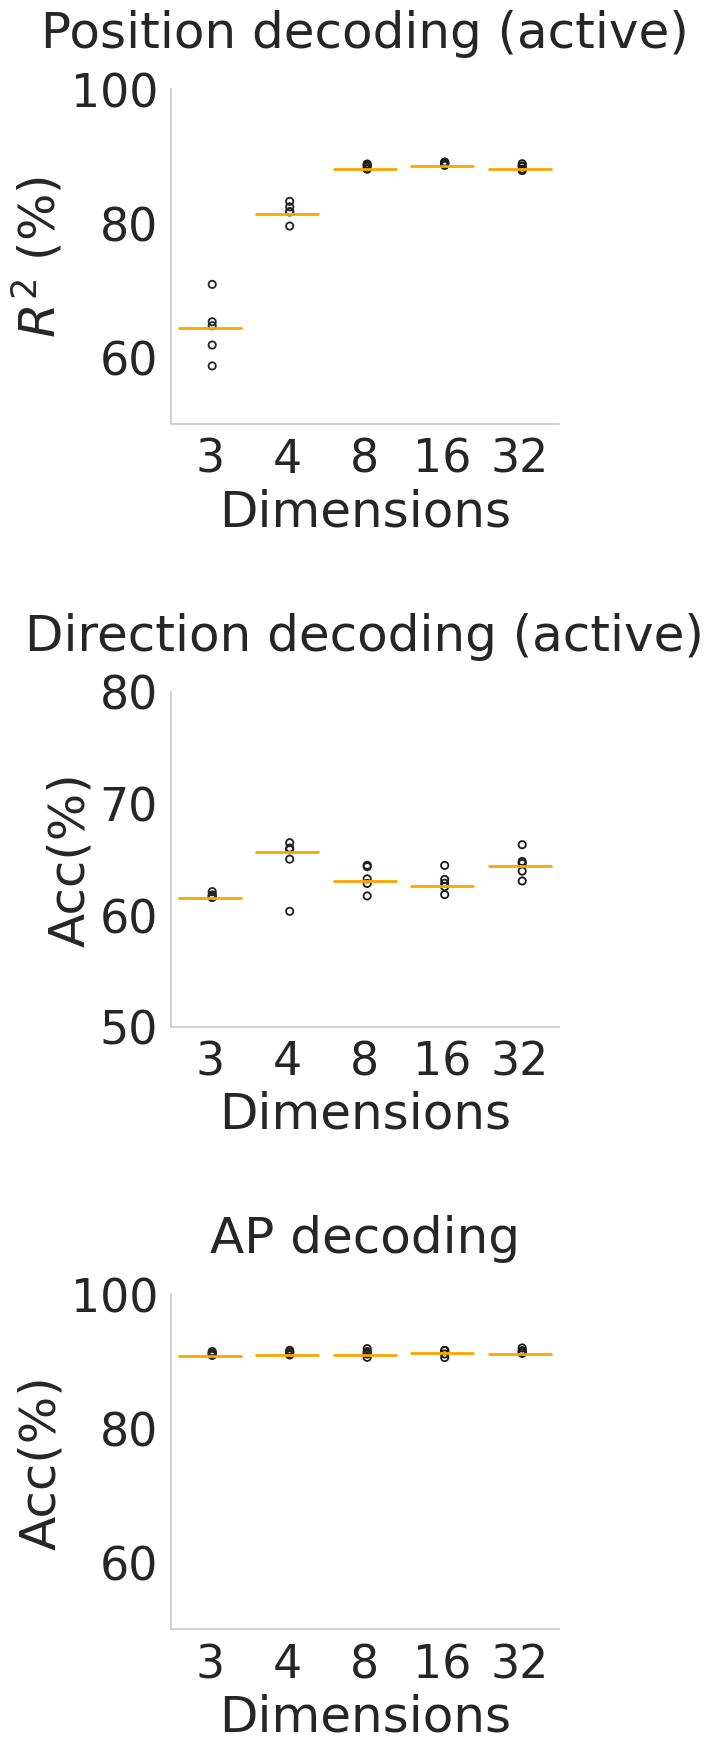

In [21]:
position_acc = data["condition_decoding"]["position"]
direction_acc = data["condition_decoding"]["direction"]
ap_acc = data["condition_decoding"]["ap"]

sns.set(font_scale=3)
sns.set_style(
    "whitegrid",
    {"axes.grid": False},
)
fig = plt.figure(figsize=(5, 20))
axs = fig.subplots(3, 1)
plt.subplots_adjust(hspace=0.8)
data_list = [position_acc, direction_acc, ap_acc]
title_list = [
    "Position decoding (active)",
    "Direction decoding (active)",
    "AP decoding",
]

units = ["$R^2$ (%)", "Acc(%)", "Acc(%)"]
ylims = [(50, 100), (50, 80), (50, 100)]
for i in range(3):
    m = 0
    ax = sns.stripplot(
        data=[data_list[i][n] for n in ["3", "4", "8", "16", "32"]],
        facecolor="none",
        color="k",
        marker="$\circ$",
        s=10,
        jitter=0,
        ax=axs[i],
    )
    sns.boxplot(
        showmeans=False,
        medianprops={"color": "orange", "ls": "-", "lw": 2},
        whiskerprops={"visible": False},
        zorder=10,
        data=[data_list[i][n] for n in ["3", "4", "8", "16", "32"]],
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=axs[i],
    )

    ax.set_xlabel("Dimensions")
    ax.set_ylim(ylims[i])
    ax.set_ylabel(units[i])
    ax.set_title(title_list[i], y=1.1)
    ax.set_xticks(ticks=np.arange(5))
    ax.set_xticklabels(labels=[3, 4, 8, 16, 32])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

plt.savefig('cebra-figures_figures_Figure3_8.png', transparent=True, dpi=500)
plt.show()

## Figure 3i

- Decoded trajectory of hand position using CEBRA-Behavior trained on active trial with x,y position of hand. Grey line is true trajectory and red line is decoded trajectory.

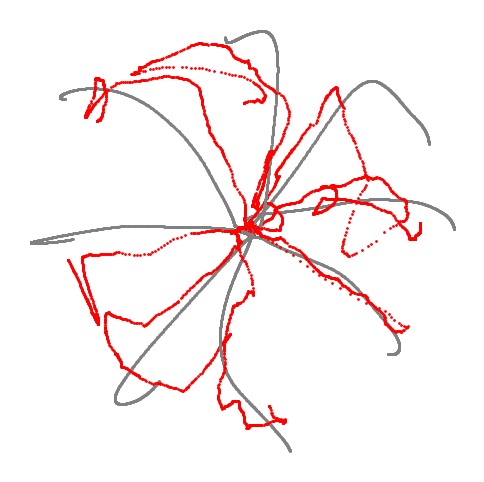

In [ ]:
true = data["trajectory"]["true"]
pred = data["trajectory"]["prediction"]
plt.figure(figsize=(6, 6))
for i in range(8):
    plt.scatter(true[i][:, 0], true[i][:, 1], s=1, c="gray")
    plt.scatter(pred[i][:, 0], pred[i][:, 1], s=1, c="red")
plt.axis("off")
plt.savefig('cebra-figures_figures_Figure3_9.png', transparent=True, dpi=300)